In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [5]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [6]:
col_categoriacal = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
df[col_categoriacal].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,United-States
1,Private,12th,Never-married,Other-service,Own-child,White,Male,United-States
2,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
3,State-gov,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
4,State-gov,Some-college,Never-married,Other-service,Not-in-family,Black,Male,United-States


In [7]:
df[col_categoriacal].isnull().sum()

workclass         2498
education            0
marital-status       0
occupation        2506
relationship         0
race                 0
gender               0
native-country     763
dtype: int64

In [8]:
for var in col_categoriacal:
  df[var].replace("[]", np.NaN, inplace=True)

In [9]:
for var in col_categoriacal:
  print(df[var].value_counts())

Private             30587
Self-emp-not-inc     3464
Local-gov            2822
State-gov            1756
Self-emp-inc         1518
Federal-gov          1284
Without-pay            20
Never-worked            8
Name: workclass, dtype: int64
HS-grad         14197
Some-college     9790
Bachelors        7219
Masters          2392
Assoc-voc        1831
11th             1647
Assoc-acdm       1447
10th             1250
7th-8th           862
Prof-school       748
9th               684
12th              587
Doctorate         536
5th-6th           468
1st-4th           223
Preschool          76
Name: education, dtype: int64
Married-civ-spouse       20147
Never-married            14513
Divorced                  5971
Widowed                   1364
Separated                 1361
Married-spouse-absent      570
Married-AF-spouse           31
Name: marital-status, dtype: int64
Craft-repair         5519
Prof-specialty       5518
Exec-managerial      5506
Adm-clerical         5004
Sales                496

In [10]:
df[['workclass','occupation','native-country']]= df[['workclass','occupation','native-country']].replace(0,np.NaN)
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

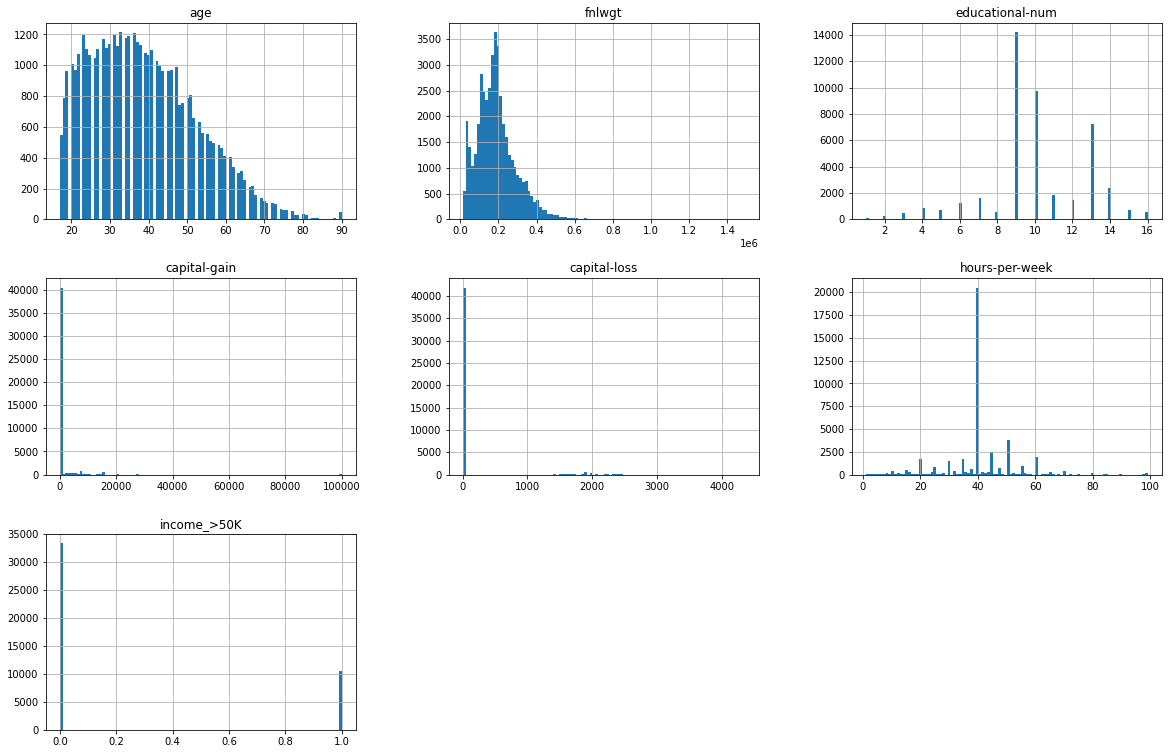

In [12]:
#visualize the distributions of our numerical variables 

df[(df['income_>50K'] > -25) & (df['income_>50K'] < 25)].hist(bins=100, figsize=(20,13))
plt.show()

In [13]:
# MENGISI MISSING VALUE 
df['workclass'] = df['workclass'].fillna(df['workclass'].mode(), inplace=True)
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])
# df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [14]:
df[['workclass']]= df[['workclass']].replace(0,np.NaN)
df.isnull().sum()

age                    0
workclass          43957
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country         0
income_>50K            0
dtype: int64

In [15]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode(), inplace=True)
df.isnull().sum()

age                    0
workclass          43957
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country         0
income_>50K            0
dtype: int64

In [16]:
series = df['workclass'].value_counts()
series.index = series.index.str.strip()

In [17]:
df.isnull().sum()

age                    0
workclass          43957
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country         0
income_>50K            0
dtype: int64

In [18]:
# df = series.rename_axis('a').reset_index(name='b')

In [19]:
df.isnull().sum()

age                    0
workclass          43957
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country         0
income_>50K            0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        0 non-null      object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       43957 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43957 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [21]:
df.isnull().sum()

age                    0
workclass          43957
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country         0
income_>50K            0
dtype: int64